# Previsão da ocorrência de doença cardíaca utilizando Machine Leaning


Este notebook utiliza diversas bibliotecas de Machine Learning e Data Sciente baseadas em Python para construir um modelo capaz de prever, utilizando atributos de exames médicos, a ocorrência ou não-ocorrência de doença cardíaca.

Para isso, será adotada a seguinte abordagem:

1. Definição da natureza do problema

2. Levantamento de dados

3. Avaliação dos modelos

4. Atributos dos dados

5. Modelagem

6. Experimentação



# 1. Definição da natureza do problema: Classificação binária

Baseado em parâmetros críticos sobre o paciente, é possível prever se: 

    - Indivíduo possui doença cardíaca ou;
    
    - Indivíduo não possui doença cardíaca.




# 2. Levantamento de dados

A base de dados original é proveninente do repositório UCI Machine Learning Repository, disponível em:https://archive.ics.uci.edu/ml/datasets/heart+disease , entretanto a versão de dados "tratados", contendo os atributos relevantes para o modelo pode ser consultada em https://www.kaggle.com/ronitf/heart-disease-uci.


# 3. Avaliação dos modelos

Foi estabelecido que o projeto terá continuidade se conseguir 95% de precisão para prever se um indivíduo possui doença cardíaca ou não.

# 4. Atributos dos dados

        1 age: 29 – 62 age in years
        2 sex: 0 – male, 1- female gender
        3 cp: 1-typical angina; 2-atypical angina; 3-non-anginal pain; 4-asymptomatic chest pain type
        4 trestbps: Numeric value(140mm/Hg) resting blood pressure in mm/Hg
        5 chol: Numeric value(289mg/dl) serum cholesterol in mg/dl
        6 fbs: 1-true, 0-false fasting blood pressure>120mg/dl
        7 restecg: 0-normal, 1-having ST-T, 2-hypertrophy resting electrocardiographic results
        8 thalach: 140,173 maximum heart rate achieved
        9 exang: 1-yes, 0-no exercise induced angina
        10 oldpeak: Numeric value ST depression induced by exercise relative to rest
        11 slope: 1-upsloping, 2-flat, 3-downsloping the slope of the peak exercise ST segment
        12 ca: 0-3 vessels number of major vessels colored by flourosopy
        13 thal: 3-normal, 6-fixed defect, 7-reversable defect thalassemia
        14 num 0: < 50% diameter narrowing; 1: > 50% diameter narrowing diagnosis of heart disease (angiographic disease status)


# 5. Modelagem

Para a análise e manipulação de dados, serão utilizadas as bibliotecas Pandas, Matplotlib e NumPy. A biblioteca Scikit-learn será utilizada para gerar modelos de previsão, testes e avaliação.

In [211]:
# Ferramentas básicas
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Permite a exibição de gráficos dentro do notebook
%matplotlib inline 

# Modelos do Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação dos modelos
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

# Carregando os dados

In [212]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Análise exploratório dos dados (exploratory data anlalysis - EDA)

Esta seção tem o objetivo de descobrir mais informações sobre a base de dados. Para isso, deve-se procurar responder aos questionamento a seguir:

    1. Quais respostas estamos tentado obter?
    2. Que tipo de dados nós temos e como nós tratamos os diferentes tipos?
    3. Quais dados estão incompletos na base de dados e como tratamos estes casos?
    4. Onde estão os "outliers" e o quanto devemos nos preocupar com eles?
    5. Como podemos adicionar, alterar ou remover atributos para potencializar a utilização dos dados?

In [213]:
# Verificar se a base de dados possui amostrar balanceadas
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

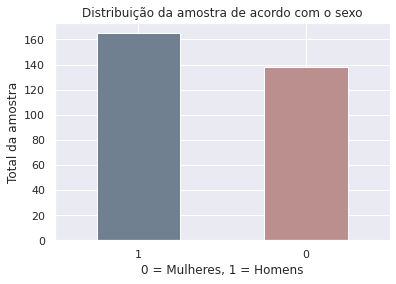

In [291]:
df['target'].value_counts().plot(kind='bar', color=['slategray','rosybrown'])
plt.xlabel('0 = Mulheres, 1 = Homens')
plt.ylabel('Total da amostra')
plt.xticks(rotation=0)
plt.title('Distribuição da amostra de acordo com o sexo');

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [216]:
# Verificar se há dados incompletos
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [217]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


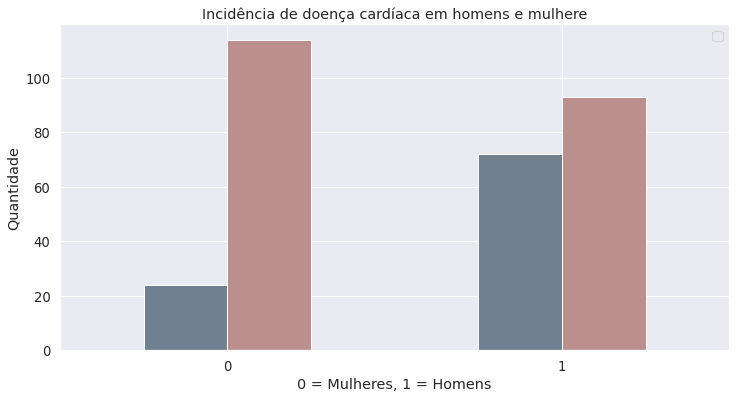

In [218]:
# Comparação entre a incidência de doença cardíaca em homens e mulheres

pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(12,6), color=['slategray','rosybrown'])
plt.title('Incidência de doença cardíaca em homens e mulhere')
plt.xlabel('0 = Mulheres, 1 = Homens')
plt.ylabel('Quantidade')
plt.legend('Mulheres','Homens')
plt.xticks(rotation=0);

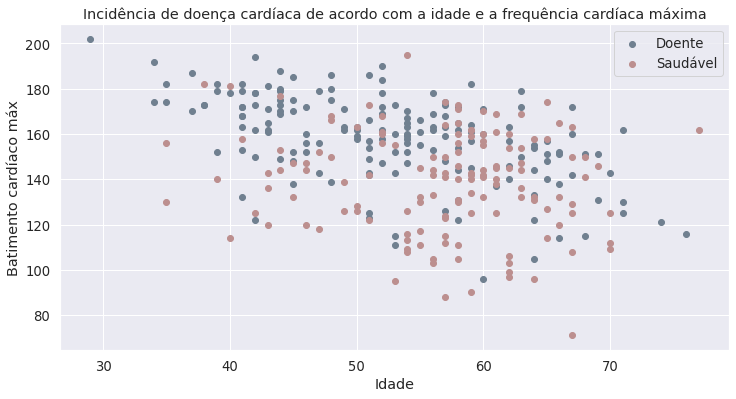

In [219]:
# Análise da incidência de doença cardíaca de acordo com a idade e a frequência cardíaca máxima

plt.figure(figsize=(12,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='slategrey')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='rosybrown')

plt.xlabel('Idade')
plt.ylabel('Batimento cardíaco máx')
plt.title('Incidência de doença cardíaca de acordo com a idade e a frequência cardíaca máxima')
plt.legend(['Doente','Saudável']);

# Encontrando padrões através de uma matriz de correlação

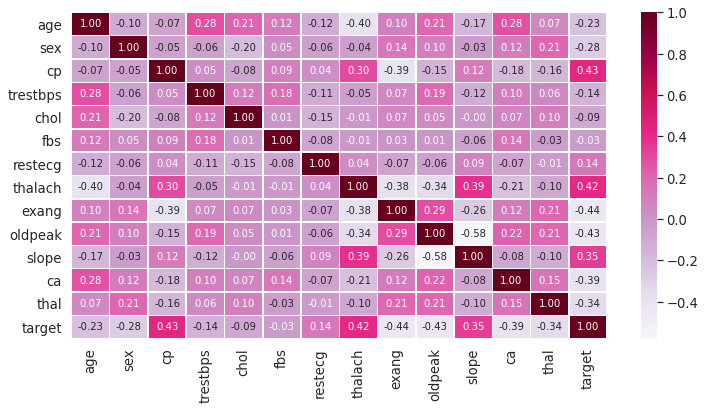

In [220]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='PuRd');

In [221]:
# Modelagem
# Tornar o teste reproduzível
np.random.seed(42)

# Dividir os dados para treino e teste do modelo
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Construção do modelo de Machine Learning

Tendo os dados preparados, agora é necessário contruir o modelo de Machine Learning. Para isso, vamos treinar e testar os dados em cada um dos modelos utilizados, que serão:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [222]:
#Vamos criar, primeiramente,  um dicionário para encapsular as funções dos modelos utilizados
models = {'Logistic Regression': LogisticRegression(),
           'K-Nearest Neighbours Classifier': KNeighborsClassifier(),
           'Random Forest Classifier': RandomForestClassifier()}

#Agora, vamos criar uma função para treinar, testar e avaliar os modelos
def fit_and_score (models, X_train, X_test, y_train, y_test):
    #Tornar a função reproduzível
    np.random.seed(42)

    #Criar um dicionário para receber os scores dos modelos
    model_scores = {}

    #Loop que treina, testa e avalia em cada um dos modelos
    for name, model in models.items():
        #Treinar o modelo com os dados
        model.fit(X_train,y_train)
        #Avaliar o modelo, salvando no dicionário model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores


In [223]:
#Aplicar a função com os dados e modelos adotados
model_scores = fit_and_score(models = models, 
                               X_train = X_train,
                               X_test =  X_test, 
                               y_train = y_train, 
                               y_test = y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

# Comparação entre os modelos

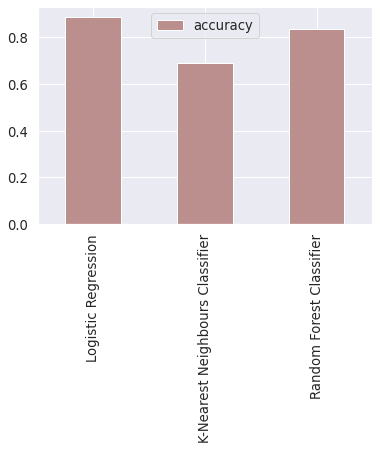

In [224]:
 #Transformar o model_scores num dataframe mais bonito
 model_compare = pd.DataFrame(model_scores, index=['accuracy'])
 model_compare.T.plot.bar(color='rosybrown');

Agora que já encontramos o melhor modelo, vamos alterar alguns parâmetros para verificar se o resultado do melhor modelo se mantém, ou ainda, se os outros modelos podem ser melhorados. Para isso, serão utilizados: 

    Ajustes de hiperparâmetros
    Peso dos atributos
    Confusion matrix
    Cross-validation
    Precisão
    Recall
    F1-Score
    Classification report
    ROC curve
    Area under de ROC curva


# Ajustes de hiperparâmetros

In [225]:
# Ajustando o K-Nearest Neighbours Classifier
train_scores = []
test_scores = []

# Criar uma lista com valor de n_neighbours variando de 1 a 21
neighbors = range(1,21)

# Instanciar o KNN
knn = KNeighborsClassifier()
np.random.seed(42)
# Fazer um loop que percorre a lista de 1 a 21
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    #Adicionar o valor do score de i às listas
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))



Score máximo do KNN no teste: 75.41%


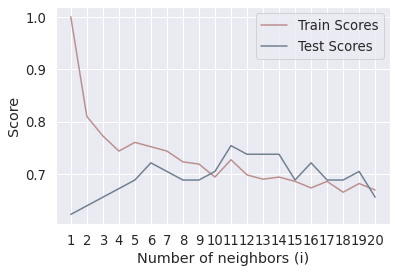

In [226]:
plt.plot(neighbors, train_scores, label='Train Scores', color='rosybrown')
plt.plot(neighbors, test_scores, label='Test Scores', color='slategrey')
plt.xlabel('Number of neighbors (i)')
plt.xticks(np.arange(1,21))
plt.ylabel('Score')
plt.legend(['Train Scores','Test Scores']);
print(f'Score máximo do KNN no teste: {max(test_scores)*100:.2f}%')

Ajustando apenas 1 parâmetro, foi possível obter resultados melhores para o classificador KNN. No próximo tópico, será realizado o ajuste de diversos parâmetros ao mesmo tempo, utilizando o RandomizedSearchCV com os demais modelos.

# Ajuste de hiperparâmetros utilizando RandomizedSearchCV

In [227]:
# Criar uma grid com os hiperparâmetros para LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# Criar uma grid com os hiperparâmetros para RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Agora que temos as grids para os 2 modelos, vamos utiliza-las no RandomizedSearchCV

In [228]:
# Ajustar o LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [229]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [230]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [231]:
# Ajustar o RandomForestClassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [232]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [233]:
rs_rf.score(X_test,y_test)

0.8688524590163934

Após avaliar os modelos com os ajustes em hiperparâmetros, foi possível identificar que o LogisticRegression continuou com o melhor desempenho. Tentaremos ajustar os parâmetros utilizando o GridSearchCV, com o objetivo de aumentar o desempenho do classificador LogisticRegression. Ao contrário do RandomSearchCV, o GridSearchCV faz uma busca exaustiva, testando todas as combinações possíveis.


In [234]:
#Nova grid com os parâmetros de LogisticRegression
np.random.seed(42)
log_reg_grid = {'C': np.logspace(-4,4,40),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train);
gs_log_reg.best_params_ , gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished


({'C': 0.19144819761699575, 'solver': 'liblinear'}, 0.8852459016393442)

# Avaliação do classificador ajustado (além da precisão)

In [235]:
# Para fazermos uma avaliação mais profunda do modelo selecionado, primeiramente vamos utilizá-lo para prever alguns valores baseados nos dados de teste:
y_preds = gs_log_reg.predict(X_test)

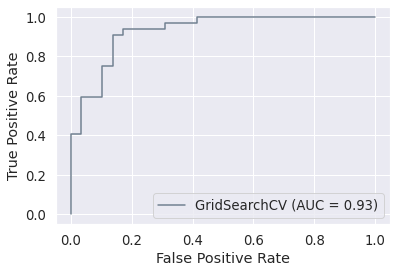

In [236]:
# Plotando a ROC e calculando AUC
plot_roc_curve(gs_log_reg,X_test,y_test, color="slategray");

In [237]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


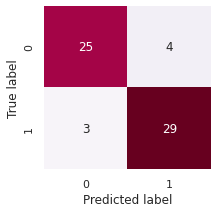

In [290]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False,
                     cmap='PuRd')
    plt.xlabel("Predicted label") 
    plt.ylabel("True label") 
    
plot_conf_mat(y_test, y_preds)

Tendo a ROC curve, AUC e confusion matrix, agora vamos obter o classification report, cross-validated precision, recall e f1-score.

# Cálculo das métricas utilizando de avaliação utilizando Cross-validation
Primeiramente, vamos instanciar novamente o classificador LogisticRegression utilizando `cross-validation()`.

In [241]:
# Buscar novamente os melhores hiperparâmetros
gs_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [242]:
# Criar novamente o classificador utilizando os melhores hiperparâmetros
clf = LogisticRegression(C= 0.19144819761699575,
                         solver= 'liblinear')

In [263]:
# Calcular parâmetros: exatidão
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
cv_acc = cv_acc.mean()

In [264]:
# Calcular parâmetros: precisão
cv_prec = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_prec = cv_prec.mean()

In [265]:
# Calcular parâmetros: recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_rec = cv_rec.mean()

In [266]:
# Calcular parâmetros: f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = cv_f1.mean()

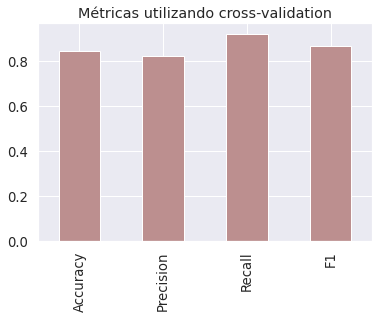

In [270]:
# Criar um dataframe com as métricas calculadas
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_prec,
                          'Recall':cv_rec,
                          'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Métricas utilizando cross-validation", legend=False, color='rosybrown');

# Importância dos atributos

Busca analisar quais atribuitos contribuem para os resultados, e em que medida. Vamos encontrar a contribuição dos atributos para o modelo de LogisticRegression.

In [275]:
# Verificar os coeficientes do classificador
np.random.seed(42)
clf = LogisticRegression(C= 0.19144819761699575,
                         solver= 'liblinear')
clf.fit(X_train,y_train)
clf.coef_

# O array abaixo tem 13 números e cada um representa o coeficiente dos atributos da base de dados

array([[ 0.00289517, -0.83734906,  0.65352831, -0.01156801, -0.00164197,
         0.0417619 ,  0.30423717,  0.02451646, -0.58988442, -0.5650317 ,
         0.44063325, -0.6294746 , -0.66754617]])

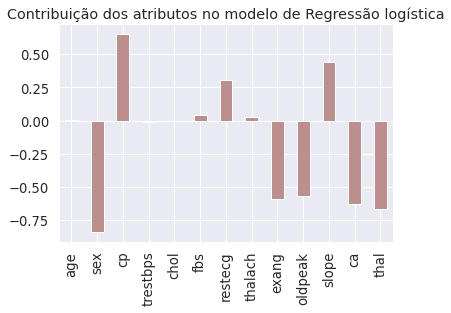

In [288]:
# Consolidar os dados de coeficientes e seus rótulos
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Contribuição dos atributos no modelo de Regressão logística", legend=False, color='rosybrown');

# 6. Experimentação

O processo inteiro de definição do problema, seleção dos modelos de classificação e análise de dados se tratou de um processo de experimentação. Não foi possível atingir o resultado estabelecido como meta, no entanto, alguns questionamentos e melhorias nos modelos/dados podem ser feitos com o objetivo de melhorar a precisão do modelo:

    1. É possível coletar mais dados e aumentar a amostra?
    2. Há outro modelo que pode ser testado? CatBoost ou XGBoost?
    3. É possível melhorar de alguma outra forma os modelos adotados?